# LEAD SCORING CASE STUDY
## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset
leads=pd.read_csv(r"Downloads\Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

####  No duplicate values in Prospect ID

In [7]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

#### No duplicate values in Lead Number

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

### EXPLORATORY DATA ANALYSIS

Data Cleaning & Treatment:

In [8]:
#dropping Lead Number and Prospect ID since they have all unique values
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
#Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [10]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#dropping cols with more than 35% missing values
cols=leads.columns
for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 35):
        leads.drop(i, 1, inplace = True)

### Categorical Attributes Analysis:

In [12]:
#checking value counts of Country column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Sweden                     3
China                      2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Belgium                    2
Bangladesh                 2
Philippines                2
Ghana                      2
Italy                      2
Sri Lanka                  1
Switzerland                1
Tanzania                   1
Indonesia                  1
Denmark                    1
Malaysia      

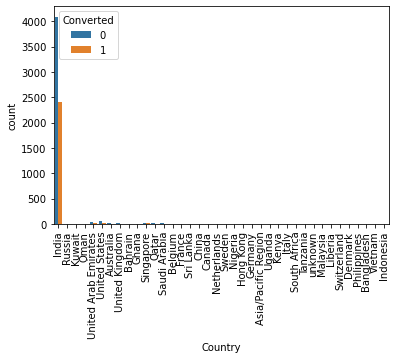

In [13]:
#plotting spread of Country columnn 
s=sns.countplot(leads.Country, hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [14]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
leads['Country'] = leads['Country'].replace(np.nan,'India')

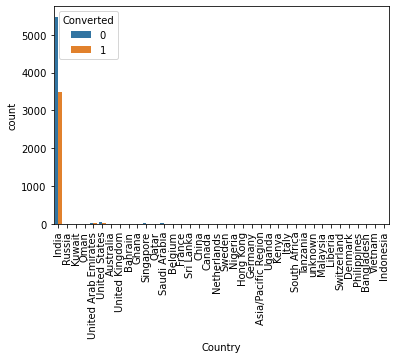

In [15]:
#plotting spread of Country columnn after replacing NaN values
s=sns.countplot(leads.Country, hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

#### As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [16]:
#creating a list of columns to be droppped
cols_to_drop=['Country']

In [17]:
#What is your current occupation
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
#imputing Nan values with mode "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [19]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

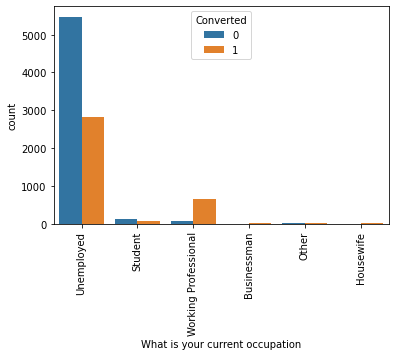

In [20]:
#visualizing count of Variable based on Converted value
s=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in terms of Absolute numbers

In [21]:
#checking value counts
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
#replacing Nan values with Mode "Better Career Prospects"
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

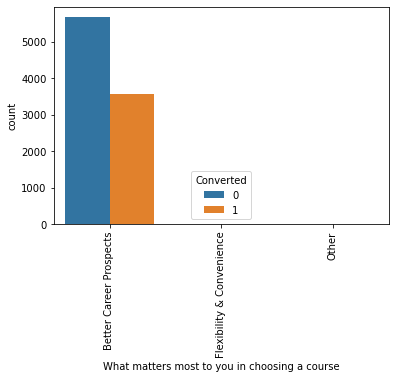

In [23]:
#visualizing count of Variable based on Converted value
s=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [24]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [26]:
#checking value counts of Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

In [27]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                               

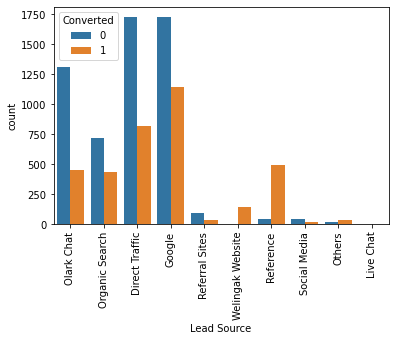

In [28]:
#visualizing count of Variable based on Converted value
s=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Inference

Maximum number of leads are generated by Google and Direct traffic.

Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [29]:
# Last Activity:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [30]:
#replacing Nan Values and combining low frequency values
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [31]:
# Last Activity:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [32]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [33]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [34]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [35]:
leads.shape

(9103, 25)

In [36]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

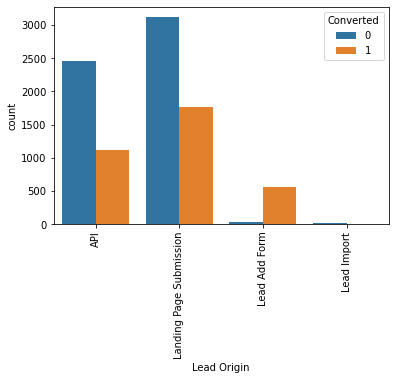

In [37]:
#visualizing count of Variable based on Converted value
s=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Inference

API and Landing Page Submission bring higher number of leads as well as conversion.

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import and Quick Add Form get very few leads.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

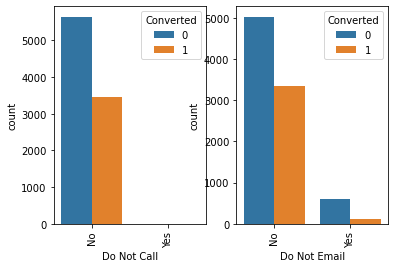

In [38]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value
ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [39]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [40]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [41]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [42]:
# IMBALANCED VARIABLES THAT CAN BE DROPPED

In [43]:
leads.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [44]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [45]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [46]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [47]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [48]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [49]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [50]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [51]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [52]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [53]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [54]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [55]:
#adding imbalanced columns to the list of columns to be dropped
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [56]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [57]:
#clubbing lower frequency values
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

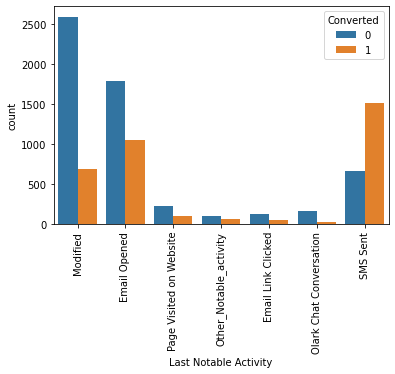

In [58]:
#visualizing count of Variable based on Converted value
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [59]:
#checking value counts for variable
leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [60]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [61]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

## Numerical Attributes Analysis:

In [62]:
#Check the % of Data that has Converted Values = 1:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

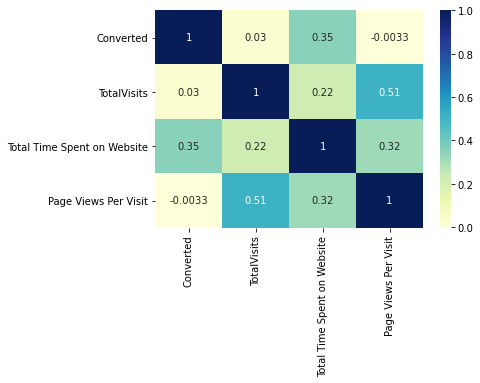

In [63]:
#Checking correlations of numeric values
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

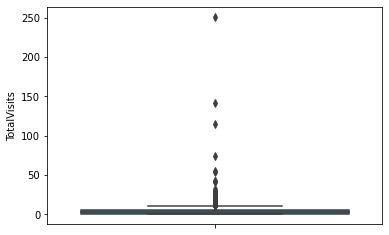

In [64]:
#Total Visits
#visualizing spread of variable
sns.boxplot(y=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [65]:
#checking percentile values for "Total Visits"
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

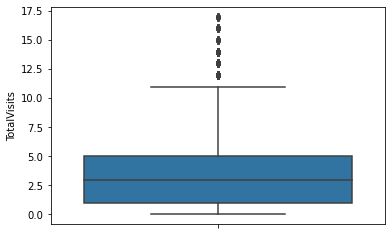

In [66]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [67]:
leads.shape

(9020, 11)

Check for the Next Numerical Column:

In [68]:
#checking percentiles for "Total Time Spent on Website"
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

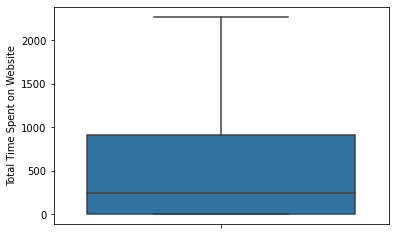

In [69]:
#visualizing spread of numeric variable
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

Check for Page Views Per Visit:

In [70]:
#checking spread of "Page Views Per Visit"
leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

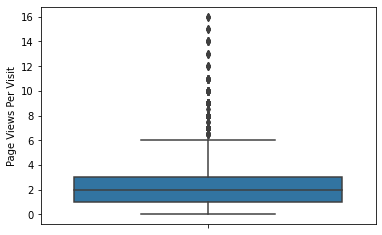

In [71]:
#visualizing spread of numeric variable
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

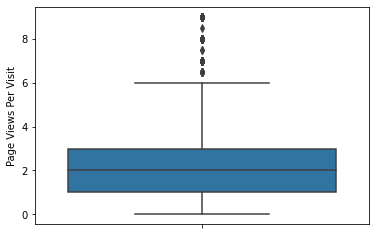

In [72]:
#Outlier Treatment: Remove top & bottom 1% 
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [73]:
leads.shape

(8953, 11)

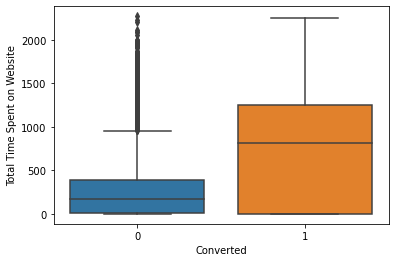

In [74]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference

Leads spending more time on the website are more likely to be converted.

Website should be made more engaging to make leads spend more time.

In [75]:
#checking missing values in leftover columns
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

### Dummy Variable Creation:

In [76]:
#getting a list of categorical columns
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [77]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview','Do Not Email']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [78]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation']], drop_first=True)
leads = pd.concat([leads,dummy],1)

In [79]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [80]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [81]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [82]:
#dropping the original columns after dummy variable creation
leads.drop(cat_cols,1,inplace = True)

In [83]:
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  What is your current occupation_Housewife  \
0                        0                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  ...  \
0                                        0  ...   
1                                        0  ...   
2                                        1  ...   
3                                        0  ...   
4                                        0  ...   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1     

### Train-Test Split & Logistic Regression Model Building:

In [84]:
from sklearn.model_selection import train_test_split
# Putting response variable to y
y = leads['Converted']
X=leads.drop('Converted', axis=1)

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [86]:
X_train.shape

(7162, 34)

### Scaling of Data:

In [87]:
#scaling numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2034    -1.079281                    -0.879231             -1.193292   
8902    -0.734953                    -0.735894             -0.665431   
3691    -0.390626                    -0.357335             -0.137569   
5034     0.298029                     2.040815              0.918154   
2464    -0.390626                     1.105444             -0.137569   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2034                                    0                          0   
8902                                    0                          1   
3691                                    1                          0   
5034                                    1                          0   
2464                                    0                          0   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
2034                        0                                          0   
8902                        0                                          1   
3691                        0                                          0   
5034                        0                                          0   
2464                        0                                          0   

      What is your current occupation_Other  \
2034                                      0   
8902                                      0   
3691                                      0   
5034                                      0   
2464                                      0   

      What is your current occupation_Student  \
2034                                        0   
8902                                        0   
3691                                        0   
5034                                        0   
2464                                        0   

      What is your current occupation_Unemployed  ...  \
2034                                           1  ...   
8902                                           0  ...   
3691                                           1  ...   
5034                                           1  ...   
2464                                           1  ...   

      Last Activity_Form Submitted on Website  \
2034                                        0   
8902                                        0   
3691                                        0   
5034                                        0   
2464                                        0   

      Last Activity_Olark Chat Conversation  \
2034                                      1   
8902                                      0   
3691                                      0   
5034                                      0   
2464                                      0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
2034                                      0                       0   
8902                                      0                       0   
3691                                      0                       1   
5034                                      0                       0   
2464                                      0                       1   

      Last Notable Activity_Email Link Clicked  \
2034                                         0   
8902                                         0   
3691                                         0   
5034                                         0   
2464                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
2034                                   0                               1   
8902                                   0                               1   
3691                                   0                               0   
5034                                   0                               1   
2464                                   0                               1   


### Model Building using Stats Model & RFE:

In [88]:
import statsmodels.api as sm

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 12),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 19),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Act

In [92]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [94]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model1 =logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7146
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3006.3
Date:                Mon, 08 Mar 2021   Deviance:                       6012.6
Time:                        11:09:01   Pearson chi2:                 7.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6653      0.545      1.221      0.222      -0.402       1.733
Total Time Spent on Website                              1.1209      0.038     29.850      0.000       1.047       1.195
Lead Origin_Lead Add Form                                2.7250      0.207     13.192      0.000       2.320       3.130
What is your current occupation_Housewife               22.0950    1.4e+04      0.002      0.999   -2.73e+04    2.74e+04
What is your current occupation_Student                 -0.5584      0.582     -0.960      0.337      -1.699       0.582
What is your current occupation_Unemployed              -0.8836      0.540     -1.636      0.102      -1.942       0.175
What is your current occupation_Working Professional     1.9100      0.566      3.373      0.001       0.800       3.020
Lead Source_Direct Traffic                              -1.4086      0.108    -13.024      0.000      -1.621      -1.197
Lead Source_Google                                      -1.0685      0.103    -10.350      0.000      -1.271      -0.866
Lead Source_Organic Search                              -1.1297      0.125     -9.052      0.000      -1.374      -0.885
Lead Source_Referral Sites                              -1.2954      0.316     -4.099      0.000      -1.915      -0.676
Lead Source_Welingak Website                             1.9955      0.750      2.660      0.008       0.525       3.466
Last Activity_Converted to Lead                         -1.1408      0.198     -5.754      0.000      -1.529      -0.752
Last Activity_Email Bounced                             -2.1487      0.340     -6.316      0.000      -2.815      -1.482
Last Activity_Olark Chat Conversation                   -1.4699      0.149     -9.898      0.000      -1.761      -1.179
Last Notable Activity_SMS Sent                           1.4706      0.075     19.600      0.000       1.324       1.618
========================================================================================================================
"""

p-value of variable 'What is your current occupation_Housewife' is high, so we can drop it

In [95]:
#dropping column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

In [96]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model2= logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7147
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3009.6
Date:                Mon, 08 Mar 2021   Deviance:                       6019.2
Time:                        11:09:01   Pearson chi2:                 7.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2657      0.487      2.601      0.009       0.312       2.219
Total Time Spent on Website                              1.1197      0.038     29.839      0.000       1.046       1.193
Lead Origin_Lead Add Form                                2.7288      0.206     13.216      0.000       2.324       3.134
What is your current occupation_Student                 -1.1595      0.527     -2.199      0.028      -2.193      -0.126
What is your current occupation_Unemployed              -1.4852      0.481     -3.088      0.002      -2.428      -0.543
What is your current occupation_Working Professional     1.3082      0.510      2.566      0.010       0.309       2.307
Lead Source_Direct Traffic                              -1.4088      0.108    -13.026      0.000      -1.621      -1.197
Lead Source_Google                                      -1.0660      0.103    -10.330      0.000      -1.268      -0.864
Lead Source_Organic Search                              -1.1251      0.125     -9.026      0.000      -1.369      -0.881
Lead Source_Referral Sites                              -1.2936      0.316     -4.094      0.000      -1.913      -0.674
Lead Source_Welingak Website                             1.9919      0.750      2.655      0.008       0.521       3.462
Last Activity_Converted to Lead                         -1.1407      0.198     -5.755      0.000      -1.529      -0.752
Last Activity_Email Bounced                             -2.1484      0.340     -6.316      0.000      -2.815      -1.482
Last Activity_Olark Chat Conversation                   -1.4724      0.149     -9.913      0.000      -1.764      -1.181
Last Notable Activity_SMS Sent                           1.4702      0.075     19.598      0.000       1.323       1.617
========================================================================================================================
"""

p value of variable 'What is your current occupation_Student' is high so we drop it

In [97]:
#dropping column with high p-value
col = col.drop('What is your current occupation_Student',1)

In [98]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model3= logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7148
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3012.2
Date:                Mon, 08 Mar 2021   Deviance:                       6024.3
Time:                        11:09:01   Pearson chi2:                 7.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3147      0.208      1.516      0.129      -0.092       0.722
Total Time Spent on Website                              1.1208      0.038     29.882      0.000       1.047       1.194
Lead Origin_Lead Add Form                                2.7349      0.206     13.252      0.000       2.330       3.139
What is your current occupation_Unemployed              -0.5366      0.197     -2.721      0.007      -0.923      -0.150
What is your current occupation_Working Professional     2.2568      0.260      8.678      0.000       1.747       2.767
Lead Source_Direct Traffic                              -1.4049      0.108    -13.002      0.000      -1.617      -1.193
Lead Source_Google                                      -1.0612      0.103    -10.290      0.000      -1.263      -0.859
Lead Source_Organic Search                              -1.1162      0.125     -8.958      0.000      -1.360      -0.872
Lead Source_Referral Sites                              -1.2901      0.316     -4.082      0.000      -1.910      -0.671
Lead Source_Welingak Website                             1.9915      0.750      2.654      0.008       0.521       3.462
Last Activity_Converted to Lead                         -1.1498      0.198     -5.803      0.000      -1.538      -0.761
Last Activity_Email Bounced                             -2.1646      0.340     -6.365      0.000      -2.831      -1.498
Last Activity_Olark Chat Conversation                   -1.4775      0.149     -9.948      0.000      -1.769      -1.186
Last Notable Activity_SMS Sent                           1.4660      0.075     19.539      0.000       1.319       1.613
========================================================================================================================
"""

Since p value of 'Lead Source_Welingak Website' is still high we drop it as well

In [99]:
col = col.drop('Lead Source_Welingak Website',1)

In [100]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model4= logm3.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7148
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3012.2
Date:                Mon, 08 Mar 2021   Deviance:                       6024.3
Time:                        11:09:01   Pearson chi2:                 7.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3147      0.208      1.516      0.129      -0.092       0.722
Total Time Spent on Website                              1.1208      0.038     29.882      0.000       1.047       1.194
Lead Origin_Lead Add Form                                2.7349      0.206     13.252      0.000       2.330       3.139
What is your current occupation_Unemployed              -0.5366      0.197     -2.721      0.007      -0.923      -0.150
What is your current occupation_Working Professional     2.2568      0.260      8.678      0.000       1.747       2.767
Lead Source_Direct Traffic                              -1.4049      0.108    -13.002      0.000      -1.617      -1.193
Lead Source_Google                                      -1.0612      0.103    -10.290      0.000      -1.263      -0.859
Lead Source_Organic Search                              -1.1162      0.125     -8.958      0.000      -1.360      -0.872
Lead Source_Referral Sites                              -1.2901      0.316     -4.082      0.000      -1.910      -0.671
Lead Source_Welingak Website                             1.9915      0.750      2.654      0.008       0.521       3.462
Last Activity_Converted to Lead                         -1.1498      0.198     -5.803      0.000      -1.538      -0.761
Last Activity_Email Bounced                             -2.1646      0.340     -6.365      0.000      -2.831      -1.498
Last Activity_Olark Chat Conversation                   -1.4775      0.149     -9.948      0.000      -1.769      -1.186
Last Notable Activity_SMS Sent                           1.4660      0.075     19.539      0.000       1.319       1.613
========================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [101]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          What is your current occupation_Unemployed  6.27
5                                  Lead Source_Google  3.05
4                          Lead Source_Direct Traffic  2.82
6                          Lead Source_Organic Search  1.82
3   What is your current occupation_Working Profes...  1.54
11                     Last Notable Activity_SMS Sent  1.46
1                           Lead Origin_Lead Add Form  1.45
10              Last Activity_Olark Chat Conversation  1.35
0                         Total Time Spent on Website  1.30
8                     Last Activity_Converted to Lead  1.10
7                          Lead Source_Referral Sites  1.08
9                         Last Activity_Email Bounced  1.07

There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [103]:
#dropping variable with high VIF
col = col.drop('What is your current occupation_Unemployed',1)

In [104]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model5 = logm5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7150
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.4
Date:                Mon, 08 Mar 2021   Deviance:                       6042.8
Time:                        11:09:01   Pearson chi2:                 7.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2050      0.083     -2.474      0.013      -0.367      -0.043
Total Time Spent on Website                              1.1226      0.037     29.944      0.000       1.049       1.196
Lead Origin_Lead Add Form                                3.0414      0.198     15.326      0.000       2.652       3.430
What is your current occupation_Working Professional     2.7702      0.177     15.681      0.000       2.424       3.116
Lead Source_Direct Traffic                              -1.4019      0.108    -12.982      0.000      -1.614      -1.190
Lead Source_Google                                      -1.0660      0.103    -10.346      0.000      -1.268      -0.864
Lead Source_Organic Search                              -1.1197      0.124     -8.997      0.000      -1.364      -0.876
Lead Source_Referral Sites                              -1.3074      0.316     -4.140      0.000      -1.926      -0.688
Last Activity_Converted to Lead                         -1.1510      0.198     -5.808      0.000      -1.539      -0.763
Last Activity_Email Bounced                             -2.1077      0.333     -6.326      0.000      -2.761      -1.455
Last Activity_Olark Chat Conversation                   -1.4649      0.148     -9.892      0.000      -1.755      -1.175
Last Notable Activity_SMS Sent                           1.4577      0.075     19.484      0.000       1.311       1.604
========================================================================================================================
"""

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                     Last Notable Activity_SMS Sent  1.38
3                          Lead Source_Direct Traffic  1.24
4                                  Lead Source_Google  1.23
0                         Total Time Spent on Website  1.19
1                           Lead Origin_Lead Add Form  1.18
2   What is your current occupation_Working Profes...  1.14
5                          Lead Source_Organic Search  1.11
7                     Last Activity_Converted to Lead  1.10
9               Last Activity_Olark Chat Conversation  1.08
8                         Last Activity_Email Bounced  1.07
6                          Lead Source_Referral Sites  1.01

All the values look good now

In [106]:
# Getting the Predicted values on the train set
y_train_pred = model5.predict(X_train_sm)
y_train_pred[:10]

2034    0.065569
8902    0.881881
3691    0.365791
5034    0.734968
2464    0.492491
1827    0.247302
1165    0.948883
2511    0.164613
6545    0.069936
636     0.039143
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06556894, 0.88188141, 0.36579055, 0.73496755, 0.49249137,
       0.247302  , 0.94888313, 0.16461316, 0.06993644, 0.03914288])

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.065569         2034
1          1        0.881881         8902
2          1        0.365791         3691
3          0        0.734968         5034
4          1        0.492491         2464

In [109]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          0        0.065569         2034          0
1          1        0.881881         8902          1
2          1        0.365791         3691          0
3          0        0.734968         5034          1
4          1        0.492491         2464          0

In [110]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3915  522]
 [ 823 1902]]


In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8122032951689472


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6979816513761468

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.8823529411764706

In [115]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11764705882352941


In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.7846534653465347


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8262980160405234


### PLOTTING ROC CURVE

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

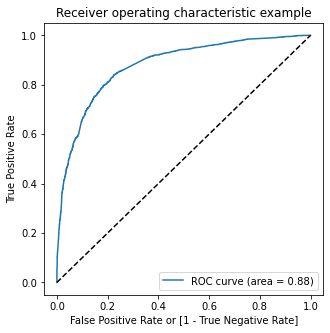

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.065569         2034          0    1    0    0    0    0   
1          1        0.881881         8902          1    1    1    1    1    1   
2          1        0.365791         3691          0    1    1    1    1    0   
3          0        0.734968         5034          1    1    1    1    1    1   
4          1        0.492491         2464          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380480  1.000000  0.000000
0.1   0.1  0.584194  0.966606  0.349335
0.2   0.2  0.736526  0.915963  0.626324
0.3   0.3  0.799358  0.834128  0.778003
0.4   0.4  0.811924  0.763670  0.841560
0.5   0.5  0.812203  0.697982  0.882353
0.6   0.6  0.794890  0.578716  0.927654
0.7   0.7  0.780787  0.503853  0.950868
0.8   0.8  0.760262  0.418716  0.970025
0.9   0.9  0.705948  0.244771  0.989182


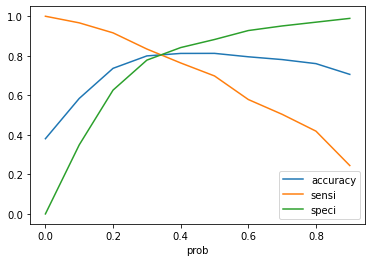

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [124]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.065569         2034          0    1    0    0    0    0   
1          1        0.881881         8902          1    1    1    1    1    1   
2          1        0.365791         3691          0    1    1    1    1    0   
3          0        0.734968         5034          1    1    1    1    1    1   
4          1        0.492491         2464          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    0                1  
2    0    0    0    0    0                1  
3    1    1    1    0    0                1  
4    0    0    0    0    0                1

In [125]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
0          0        0.065569         2034                0           7
1          1        0.881881         8902                1          88
2          1        0.365791         3691                1          37
3          0        0.734968         5034                1          73
4          1        0.492491         2464                1          49

In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7993577213068975

In [127]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3452,  985],
       [ 452, 2273]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8341284403669724

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.7780031552851026

### Observation:
So as we can see above that the ROC curve has a value of 0.88
which is very good. We have the following values for the Train Data:

Accuracy : 79.93%

Sensitivity : 83.41%

Specificity : 77.80%

In [131]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3452,  985],
       [ 452, 2273]], dtype=int64)

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

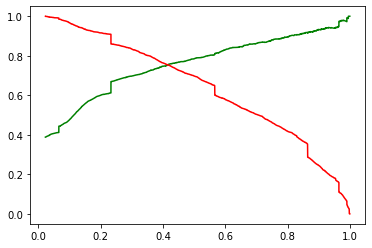

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [135]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
9190     0.283496                    -0.236884              0.900169   
5625    -0.405902                     2.259155             -0.153782   
6082     4.764585                     1.154502              1.031913   
6847    -0.405902                    -0.462961             -0.153782   
7470     0.628195                     2.292239              1.427145   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
9190                                    1                          0   
5625                                    0                          0   
6082                                    1                          0   
6847                                    1                          0   
7470                                    1                          0   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
9190                        0                                          0   
5625                        0                                          0   
6082                        0                                          0   
6847                        0                                          0   
7470                        0                                          0   

      What is your current occupation_Other  \
9190                                      0   
5625                                      0   
6082                                      0   
6847                                      0   
7470                                      0   

      What is your current occupation_Student  \
9190                                        0   
5625                                        0   
6082                                        0   
6847                                        0   
7470                                        0   

      What is your current occupation_Unemployed  ...  \
9190                                           1  ...   
5625                                           1  ...   
6082                                           1  ...   
6847                                           1  ...   
7470                                           0  ...   

      Last Activity_Form Submitted on Website  \
9190                                        0   
5625                                        0   
6082                                        0   
6847                                        0   
7470                                        0   

      Last Activity_Olark Chat Conversation  \
9190                                      0   
5625                                      1   
6082                                      0   
6847                                      0   
7470                                      0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
9190                                      0                       1   
5625                                      0                       0   
6082                                      0                       1   
6847                                      0                       0   
7470                                      0                       1   

      Last Notable Activity_Email Link Clicked  \
9190                                         0   
5625                                         0   
6082                                         0   
6847                                         0   
7470                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
9190                                   0                               0   
5625                                   0                               0   
6082                                   0                               0   
6847                                   1                               0   
7470                                   0                               0   


In [136]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
9190                    -0.236884                          0   
5625                     2.259155                          0   
6082                     1.154502                          0   
6847                    -0.462961                          0   
7470                     2.292239                          0   

      What is your current occupation_Working Professional  \
9190                                                  0      
5625                                                  0      
6082                                                  0      
6847                                                  0      
7470                                                  1      

      Lead Source_Direct Traffic  Lead Source_Google  \
9190                           0                   1   
5625                           0                   0   
6082                           1                   0   
6847                           1                   0   
7470                           0                   0   

      Lead Source_Organic Search  Lead Source_Referral Sites  \
9190                           0                           0   
5625                           0                           0   
6082                           0                           0   
6847                           0                           0   
7470                           1                           0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
9190                                0                            0   
5625                                0                            0   
6082                                0                            0   
6847                                0                            0   
7470                                0                            0   

      Last Activity_Olark Chat Conversation  Last Notable Activity_SMS Sent  
9190                                      0                               1  
5625                                      1                               0  
6082                                      0                               1  
6847                                      0                               0  
7470                                      0                               1

In [137]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [138]:
y_test_pred = model5.predict(X_test_sm)

In [139]:
y_test_pred[:10]

9190    0.480209
5625    0.703954
6082    0.758928
6847    0.106541
7470    0.995833
2832    0.208386
6135    0.066010
2487    0.567802
7550    0.066010
6293    0.234192
dtype: float64

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred= pd.DataFrame(y_test_pred)

In [141]:
# Let's see the head
y_pred.head()

0
9190  0.480209
5625  0.703954
6082  0.758928
6847  0.106541
7470  0.995833

In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [146]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         9190  0.480209
1          0         5625  0.703954
2          0         6082  0.758928
3          0         6847  0.106541
4          1         7470  0.995833

In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [148]:
y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0         9190        0.480209
1          0         5625        0.703954
2          0         6082        0.758928
3          0         6847        0.106541
4          1         7470        0.995833

In [149]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0         9190          0        0.480209          48
1         5625          0        0.703954          70
2         6082          0        0.758928          76
3         6847          0        0.106541          11
4         7470          1        0.995833         100

In [151]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [152]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0         9190          0        0.480209          48                1
1         5625          0        0.703954          70                1
2         6082          0        0.758928          76                1
3         6847          0        0.106541          11                0
4         7470          1        0.995833         100                1

In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7883863763260748

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[868, 253],
       [126, 544]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8119402985074626

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.7743086529884032

### Observation

After running the model on the Test Data these are the figures we obtain:

Accuracy : 78.83%

Sensitivity : 81.19%

Specificity : 77.43%

### Final Observation:

Let us compare the values obtained for Train & Test:

### Train Data: 

Accuracy : 79.93%

Sensitivity : 83.41%

Specificity : 77.80%


### Test Data: 

Accuracy : 78.83%

Sensitivity : 81.19%

Specificity : 77.43%

We have predicted the final scores between 0 and 100 for the leads with all the metrics giving good values. This model will give the CEO and the marketing group enough accurate information to go after the 'hot' leads that matter.